Shapefile – cvičení 1

Stáhni přiložený soubor london.zip s prostorovými daty ve formátu Shapefile.

Nahraj tento soubor do běžícího prostředí Google Colab (nebo na Google Drive).

V notebooku tento .zip soubor rozbal pomocí knihovny zipfile:

import zipfile
with zipfile.ZipFile("cesta_k_zip_souboru/nazev_zip_souboru.zip", "r") as zip_ref:
    zip_ref.extractall("cilova_slozka")


Nainstaluj a naimportuj knihovnu geopandas.

Pomocí geopandas načti data ze souboru London_Borough_Excluding_MHW.shp do proměnné london_excl_mhw.

Zobraz dataframe london_excl_mhw.

In [12]:
# Diagnostika složky Shapefile na Google Drive

from google.colab import drive
import os

# 1) Připojení Google Drive
drive.mount('/content/drive')

# 2) Cesta ke složce Shapefile podle dohody
shapefile_dir = "/content/drive/MyDrive/Colab Notebooks/Vis/Shapefile"

print("Kontroluji složku:", shapefile_dir)
print("-" * 60)

# 3) Ověření, že složka existuje
if not os.path.exists(shapefile_dir):
    print("❌ Složka NEEXISTUJE. Colab ji v této cestě nevidí.")
else:
    print("✅ Složka existuje.")
    print("\nObsah složky (jen 1. úroveň):")
    items = os.listdir(shapefile_dir)
    if not items:
        print(" – (prázdná složka, žádné soubory ani podsložky)")
    else:
        for name in items:
            full = os.path.join(shapefile_dir, name)
            typ = "složka" if os.path.isdir(full) else "soubor"
            print(f" - {name}   ({typ})")

    print("\nRekurzivní hledání všech .zip a .shp souborů pod Shapefile:")
    found_any = False
    for root, dirs, files in os.walk(shapefile_dir):
        for f in files:
            if f.lower().endswith((".zip", ".shp")):
                found_any = True
                print(" -", os.path.join(root, f))
    if not found_any:
        print(" (žádné .zip ani .shp soubory nebyly nalezeny)")

print("-" * 60)
print("✅ Diagnostika dokončena.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Kontroluji složku: /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile
------------------------------------------------------------
✅ Složka existuje.

Obsah složky (jen 1. úroveň):
 - wise_large_rivers   (složka)
 - monte_carlo   (složka)
 - london   (složka)
 - colosseo   (složka)
 - BiogeoRegions2016_shapefile   (složka)

Rekurzivní hledání všech .zip a .shp souborů pod Shapefile:
 - /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/wise_large_rivers/Large_rivers.shp
 - /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/monte_carlo/monte_carlo/shape/railways.shp
 - /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/monte_carlo/monte_carlo/shape/points.shp
 - /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/monte_carlo/monte_carlo/shape/waterways.shp
 - /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/monte_carlo/monte_carlo/shape/roads.shp


In [13]:
# Shapefile – exercise 1 (FINÁLNÍ OPRAVENÁ CESTA)

!pip install geopandas shapely pyproj fiona >/dev/null

from google.colab import drive
import os, zipfile
import geopandas as gpd

drive.mount('/content/drive')

# SPRÁVNÁ CESTA – s velkým S !!!
zip_path = "/content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/london.zip"
extract_dir = "/content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/london_unzipped"

print("Používám ZIP:", zip_path)

# 1) kontrola existence
if not os.path.isfile(zip_path):
    raise FileNotFoundError(f"Soubor neexistuje: {zip_path}")

# 2) rozbalení ZIP
os.makedirs(extract_dir, exist_ok=True)
with zipfile.ZipFile(zip_path, "r") as zf:
    zf.extractall(extract_dir)

print("Zip byl úspěšně rozbalen do:", extract_dir)

# 3) najdeme SHP soubor uvnitř ZIPu
shp_file = None
for root, dirs, files in os.walk(extract_dir):
    for f in files:
        if f == "London_Borough_Excluding_MHW.shp":
            shp_file = os.path.join(root, f)
            break

if shp_file is None:
    raise FileNotFoundError("Nenašel jsem London_Borough_Excluding_MHW.shp v rozbalené složce.")

print("Načítám SHP:", shp_file)

# 4) načtení shapefile
london_excl_mhw = gpd.read_file(shp_file)

print("Načteno OK.")
london_excl_mhw.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Používám ZIP: /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/london.zip


FileNotFoundError: Soubor neexistuje: /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/london.zip

In [14]:
# Shapefile – exercise 1 (verze bez ZIPu, shapefile už je rozbalený)

!pip install geopandas shapely pyproj fiona >/dev/null

from google.colab import drive
import geopandas as gpd

# 1) Připojení Google Drive
drive.mount('/content/drive')

# 2) Cesta k rozbalenému shapefile
# >> pokud se liší, ZKOPÍRUJ ji přesně z diagnostického výpisu <<
shp_path = "/content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/london/london/London_Borough_Excluding_MHW.shp"

print("Načítám soubor:")
print(shp_path)

# 3) Načtení shapefile
london_excl_mhw = gpd.read_file(shp_path)

# 4) Souhrnný výpis
print("\n✅ CO BYLO PROVEDENO:")
print("- Připojen Google Drive.")
print("- Nastavena cesta k již rozbalenému souboru .shp.")
print("- Data načtena do GeoDataFrame 'london_excl_mhw'.")

print("\n📊 INFORMACE O DATAFRAME:")
print("- Typ:", type(london_excl_mhw))
print("- Počet řádků:", len(london_excl_mhw))
print("- Sloupce:", london_excl_mhw.columns.tolist())

# 5) Náhled na prvních 5 řádků
london_excl_mhw.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Načítám soubor:
/content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/london/london/London_Borough_Excluding_MHW.shp

✅ CO BYLO PROVEDENO:
- Připojen Google Drive.
- Nastavena cesta k již rozbalenému souboru .shp.
- Data načtena do GeoDataFrame 'london_excl_mhw'.

📊 INFORMACE O DATAFRAME:
- Typ: <class 'geopandas.geodataframe.GeoDataFrame'>
- Počet řádků: 33
- Sloupce: ['NAME', 'GSS_CODE', 'HECTARES', 'NONLD_AREA', 'ONS_INNER', 'SUB_2009', 'SUB_2006', 'geometry']


,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


In [15]:
# DIAGNOSTIKA SLOŽKY SHAPEFILE – FINÁLNÍ VERZE
# Ověří: zda složka existuje, co obsahuje, a zda jsou uvnitř potřebné ZIPy

from google.colab import drive
import os

# 1) Připojení Google Drive
drive.mount('/content/drive')

# 2) Cesta ke složce Shapefile (podle tvé struktury)
shapefile_dir = "/content/drive/MyDrive/Colab Notebooks/Vis/Shapefile"

print("Kontroluji složku:", shapefile_dir)
print("-" * 60)

# 3) Ověření existence
if not os.path.exists(shapefile_dir):
    print("❌ Složka NEEXISTUJE. Colab ji v této cestě nevidí.")
else:
    print("✅ Složka existuje.\n")

    # 4) Výpis obsahu složky (1. úroveň)
    print("📁 Obsah složky (jen první úroveň):")
    try:
        items = os.listdir(shapefile_dir)
        if not items:
            print(" – (prázdná složka)")
        else:
            for name in items:
                full = os.path.join(shapefile_dir, name)
                t = "složka" if os.path.isdir(full) else "soubor"
                print(f" - {name}   ({t})")
    except NotADirectoryError:
        print("❌ Objekt 'Shapefile' není složka (pravděpodobně nahraný jako soubor).")

    print("\n🔍 Rekurzivní hledání všech .zip souborů:")
    found_zip = False
    for root, dirs, files in os.walk(shapefile_dir):
        for f in files:
            if f.lower().endswith(".zip"):
                found_zip = True
                print(" -", os.path.join(root, f))
    if not found_zip:
        print(" – (nenalezeny žádné .zip soubory)")

print("-" * 60)
print("Diagnostika dokončena.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Kontroluji složku: /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile
------------------------------------------------------------
✅ Složka existuje.

📁 Obsah složky (jen první úroveň):
 - BiogeoRegions2016_shapefile.zip   (soubor)
 - london.zip   (soubor)
 - colosseo.zip   (soubor)
 - wise_large_rivers.zip   (soubor)
 - monte_carlo.zip   (soubor)

🔍 Rekurzivní hledání všech .zip souborů:
 - /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/BiogeoRegions2016_shapefile.zip
 - /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/london.zip
 - /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/colosseo.zip
 - /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/wise_large_rivers.zip
 - /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/monte_carlo.zip
------------------------------------------------------------
Diagnostika dokončena.


In [16]:
# Shapefile – exercise 1
# Kroky 3–6: rozbalení london.zip, načtení London_Borough_Excluding_MHW.shp, zobrazení dataframe

# 1) Instalace knihoven pro geopandas
!pip install geopandas shapely pyproj fiona >/dev/null

# 2) Importy
from google.colab import drive
import os
import zipfile
import geopandas as gpd

# 3) Připojení Google Drive
drive.mount('/content/drive')

# 4) Cesty podle struktury na disku
base_dir   = "/content/drive/MyDrive/Colab Notebooks/Vis/Shapefile"
zip_path   = os.path.join(base_dir, "london.zip")
extract_dir = os.path.join(base_dir, "london_unzipped")

print("Základní složka:", base_dir)
print("ZIP soubor:", zip_path)
print("Složka pro rozbalení:", extract_dir)
print("-" * 60)

# 5) Kontrola, že london.zip existuje
if not os.path.isfile(zip_path):
    raise FileNotFoundError(
        f"Soubor {zip_path} neexistuje. Zkontroluj, že je ve složce Shapefile opravdu london.zip."
    )

# 6) Rozbalení ZIPu pomocí zipfile (bod 3 zadání)
os.makedirs(extract_dir, exist_ok=True)
with zipfile.ZipFile(zip_path, "r") as zf:
    zf.extractall(extract_dir)

print("✅ london.zip byl rozbalen do:")
print(extract_dir)
print("\nSoubory po rozbalení:")
for root, dirs, files in os.walk(extract_dir):
    for f in files:
        print(" -", os.path.join(root, f))
print("-" * 60)

# 7) Hledání souboru London_Borough_Excluding_MHW.shp (bod 5 – příprava)
shp_path = None
for root, dirs, files in os.walk(extract_dir):
    for f in files:
        if f == "London_Borough_Excluding_MHW.shp":
            shp_path = os.path.join(root, f)
            break
    if shp_path is not None:
        break

if shp_path is None:
    raise FileNotFoundError(
        "Po rozbalení jsem nenašel 'London_Borough_Excluding_MHW.shp'. "
        "Zkontroluj obsah london.zip."
    )

print("✅ Nalezený shapefile:", shp_path)
print("-" * 60)

# 8) Načtení shapefile do GeoDataFrame pomocí geopandas (bod 5 zadání)
london_excl_mhw = gpd.read_file(shp_path)

# 9) Souhrnný výpis (co všechno bylo provedeno) + základní info o dataframe (bod 6)
print("\n✅ CO VŠECHNO BYLO PROVEDENO:")
print("- Připojen Google Drive.")
print("- Nalezen a rozbalen soubor 'london.zip'.")
print("- V rozbalené složce nalezen soubor 'London_Borough_Excluding_MHW.shp'.")
print("- Shapefile načten do proměnné 'london_excl_mhw' (GeoDataFrame).")

print("\n📊 INFORMACE O DATAFRAME 'london_excl_mhw':")
print("- Typ objektu:", type(london_excl_mhw))
print("- Počet řádků:", len(london_excl_mhw))
print("- Počet sloupců:", len(london_excl_mhw.columns))
print("- Názvy sloupců:", london_excl_mhw.columns.tolist())

# 10) Zobrazení prvních 5 řádků (bod 6 – Display london_excl_mhw dataframe)
london_excl_mhw.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Základní složka: /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile
ZIP soubor: /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/london.zip
Složka pro rozbalení: /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/london_unzipped
------------------------------------------------------------
✅ london.zip byl rozbalen do:
/content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/london_unzipped

Soubory po rozbalení:
 - /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/london_unzipped/london/London_Borough_Excluding_MHW.shp
 - /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/london_unzipped/london/London_Borough_Excluding_MHW.shx
 - /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/london_unzipped/london/London_Borough_Excluding_MHW.sbx
 - /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/london_unzipped/london/London_Ward_CityMerged.BOROUGH.atx
 

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


Shapefile – Exercise 2

Stáhni přiložený soubor london.zip se shapefile daty.

Nahraj soubor do Colabu nebo na Google Drive.

Rozbal ho v notebooku pomocí knihovny zipfile.

Nainstaluj a importuj knihovnu geopandas.

Pomocí geopandas načti soubor London_Ward_CityMerged.shp do proměnné london_ward.

Zobraz prvních 15 řádků dataframe london_ward.

In [17]:
# Shapefile – exercise 2
# Načtení souboru London_Ward_CityMerged.shp a zobrazení prvních 15 řádků

import geopandas as gpd
import os

# 1) Cesta do složky, kam se rozbalil london.zip v Exercise 1
extract_dir = "/content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/london_unzipped"

# 2) Najdeme shapefile London_Ward_CityMerged.shp
shp_ward_path = None
for root, dirs, files in os.walk(extract_dir):
    for f in files:
        if f == "London_Ward_CityMerged.shp":
            shp_ward_path = os.path.join(root, f)
            break
    if shp_ward_path:
        break

if shp_ward_path is None:
    raise FileNotFoundError("Soubor London_Ward_CityMerged.shp nebyl nalezen. Zkontroluj obsah rozbaleného archivu.")

print("Nalezený shapefile:", shp_ward_path)

# 3) Načtěme shapefile
london_ward = gpd.read_file(shp_ward_path)

# 4) Souhrnný výpis
print("\n✅ CO BYLO PROVEDENO:")
print("- Vyhledán shapefile London_Ward_CityMerged.shp")
print("- Načten do GeoDataFrame 'london_ward'")

print("\n📊 INFORMACE O DATAFRAME:")
print("- Počet řádků:", len(london_ward))
print("- Počet sloupců:", len(london_ward.columns))
print("- Názvy sloupců:", london_ward.columns.tolist())

# 5) Zobrazení prvních 15 řádků
london_ward.head(15)


Nalezený shapefile: /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/london_unzipped/london/London_Ward_CityMerged.shp

✅ CO BYLO PROVEDENO:
- Vyhledán shapefile London_Ward_CityMerged.shp
- Načten do GeoDataFrame 'london_ward'

📊 INFORMACE O DATAFRAME:
- Počet řádků: 625
- Počet sloupců: 8
- Názvy sloupců: ['NAME', 'GSS_CODE', 'HECTARES', 'NONLD_AREA', 'LB_GSS_CD', 'BOROUGH', 'POLY_ID', 'geometry']


,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.6 165447.1, 517837.1 165469.4..."
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.5 167303.4, 518114.3 167307.5..."
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480 166909.8, 520490.7 166901.9, ..."
4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,"POLYGON ((522071 168144.9, 522063.9 168144, 52..."
5,Coombe Hill,E05000406,442.170,0.0,E09000021,Kingston upon Thames,117159,"POLYGON ((522007.6 169297.3, 521931.8 169362, ..."
6,Chessington North and Hook,E05000404,192.980,0.0,E09000021,Kingston upon Thames,50530,"POLYGON ((517175.3 164077.3, 517165.4 164188.3..."
7,Surbiton Hill,E05000413,166.482,0.0,E09000021,Kingston upon Thames,50457,"POLYGON ((517469.3 166878.5, 517960.5 167210.2..."
8,Old Malden,E05000410,180.016,0.0,E09000021,Kingston upon Thames,50455,"POLYGON ((522231.1 166015, 522198 166016.9, 52..."
9,St. Mark's,E05000412,137.578,0.0,E09000021,Kingston upon Thames,50450,"POLYGON ((517460.6 167802.9, 517490.4 167778.2..."


Shapefile – exercise 3

Stáhni soubor colosseo.zip s daty ve formátu Shapefile.

Nahraj tento soubor do běžícího prostředí Colabu (nebo na Google Drive).

V notebooku rozbal nahraný .zip soubor pomocí knihovny zipfile.

Nainstaluj a naimportuj knihovnu geopandas.

Načti data ze souboru natural.shp do proměnné colosseo_natural.

Načti data ze souboru buildings.shp do proměnné colosseo_buildings.

Načti data ze souboru roads.shp do proměnné colosseo_roads.

Vykresli mapu z proměnné colosseo_natural – použij barvu #BB9BB0, velikost obrázku (16, 14) a nastav pořadí vykreslení (z-order) na 3.

Vytvoř druhou vizualizační vrstvu tak, že k colosseo_natural přidáš colosseo_buildings. Výsledek ulož do proměnné second_layer_plot. Pro budovy použij barvu #CCCBCB, velikost obrázku (16, 14) a z-order 2.

Vytvoř třetí vizualizační vrstvu tak, že k předchozím vrstvám přidáš colosseo_roads. Výsledek ulož do proměnné third_layer_plot. Pro silnice použij barvu #1C1D21, velikost obrázku (16, 14) a z-order 1. Osy grafu vypni.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Základní složka: /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile
ZIP soubor: /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/colosseo.zip
Složka pro rozbalení: /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/colosseo_unzipped
------------------------------------------------------------
✅ colosseo.zip byl rozbalen do:
/content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/colosseo_unzipped

Soubory po rozbalení:
 - /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/colosseo_unzipped/colosseo/README.html
 - /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/colosseo_unzipped/colosseo/CHECKSUM.txt
 - /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/colosseo_unzipped/colosseo/README.txt
 - /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/colosseo_unzipped/colosseo/logfile.txt
 - /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/colosse

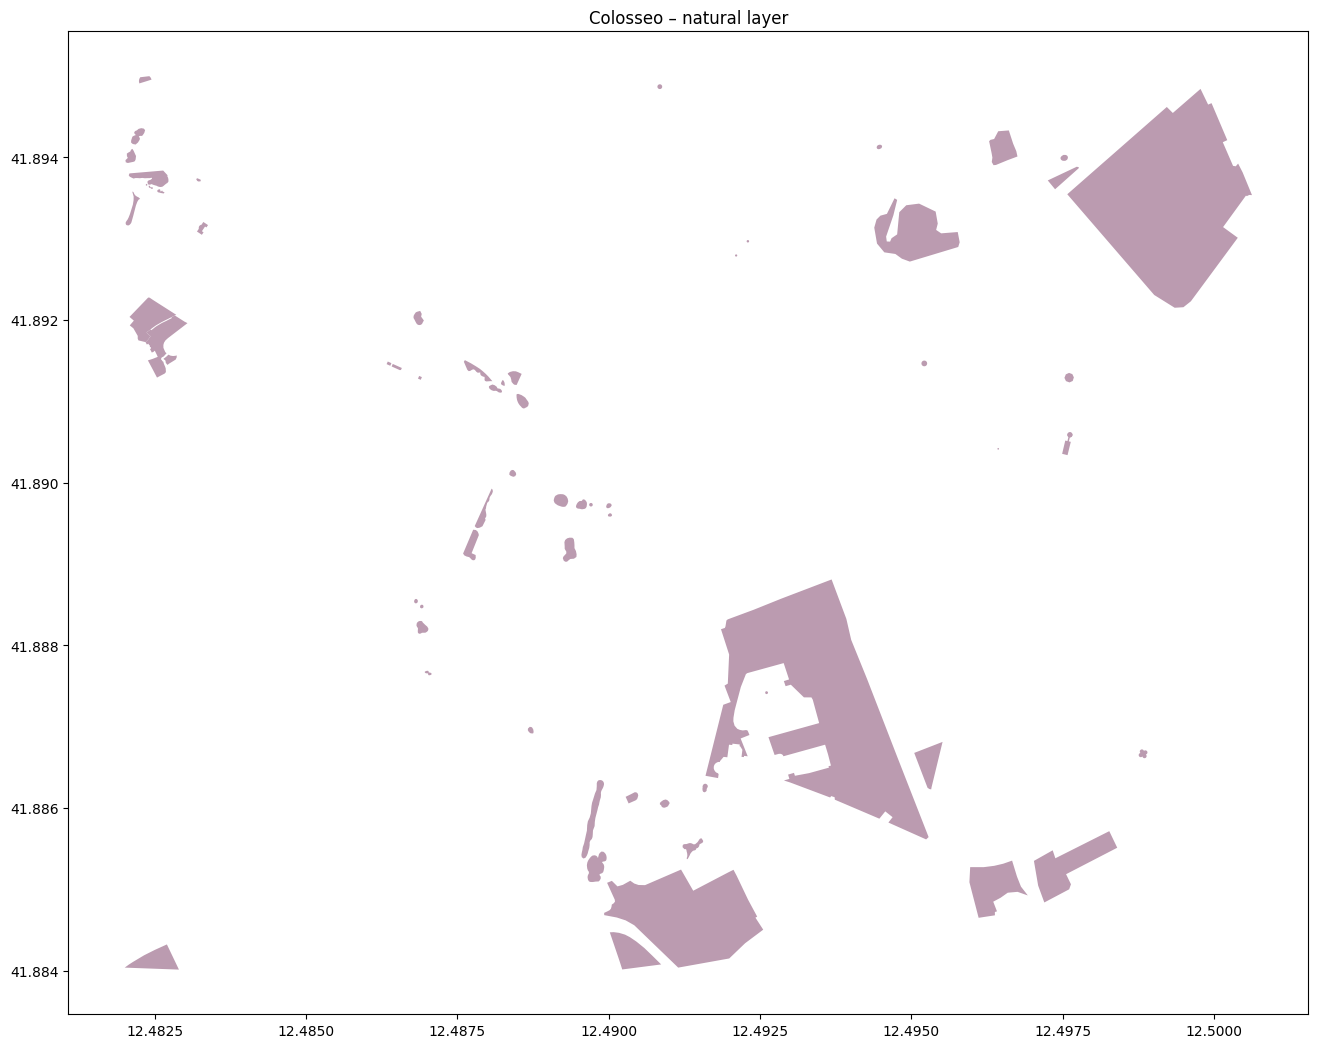

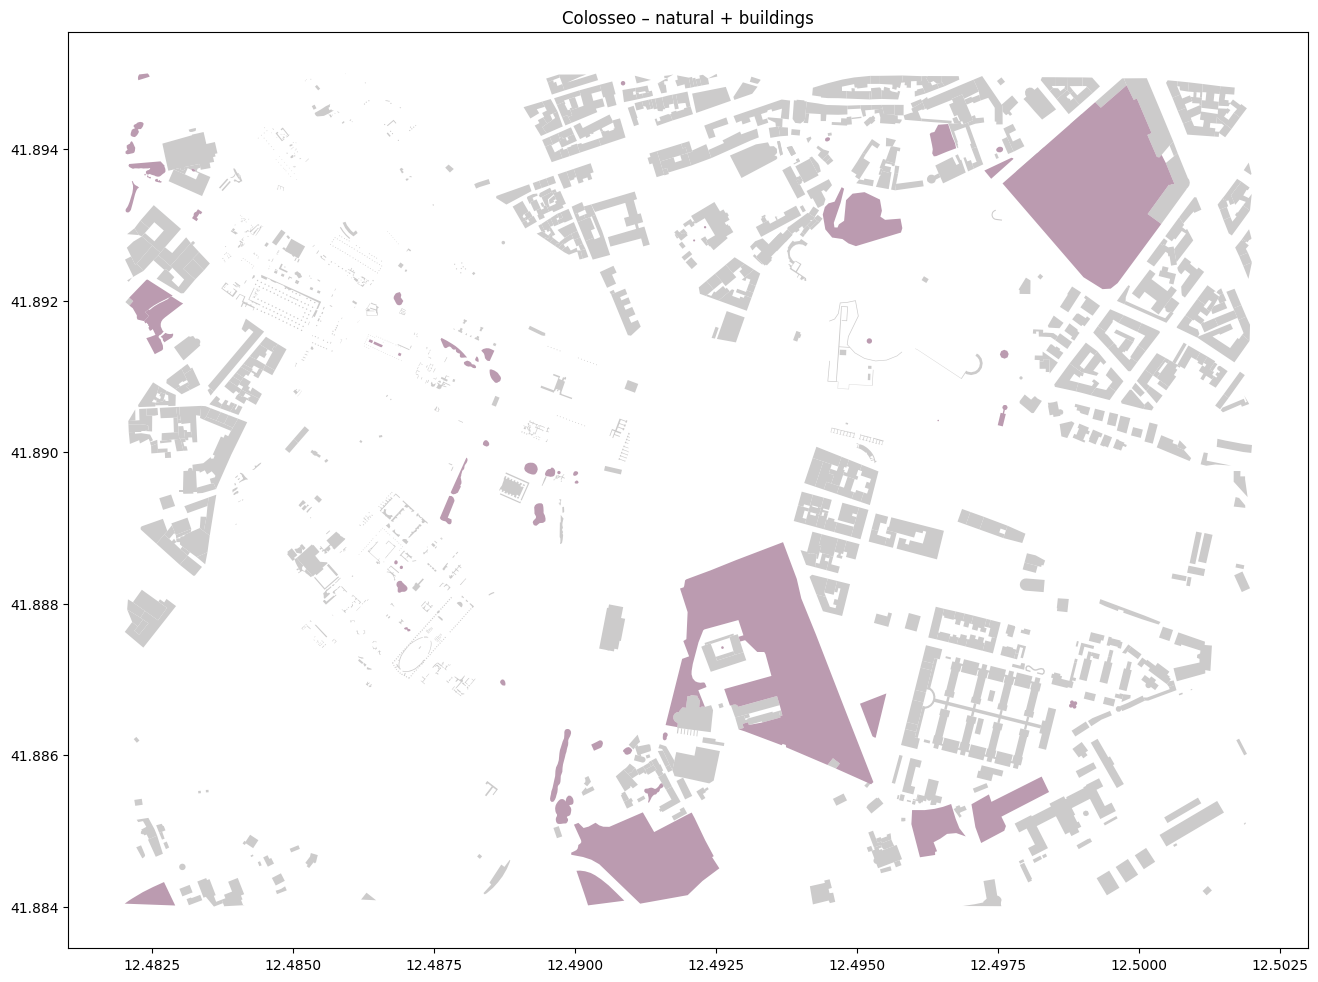

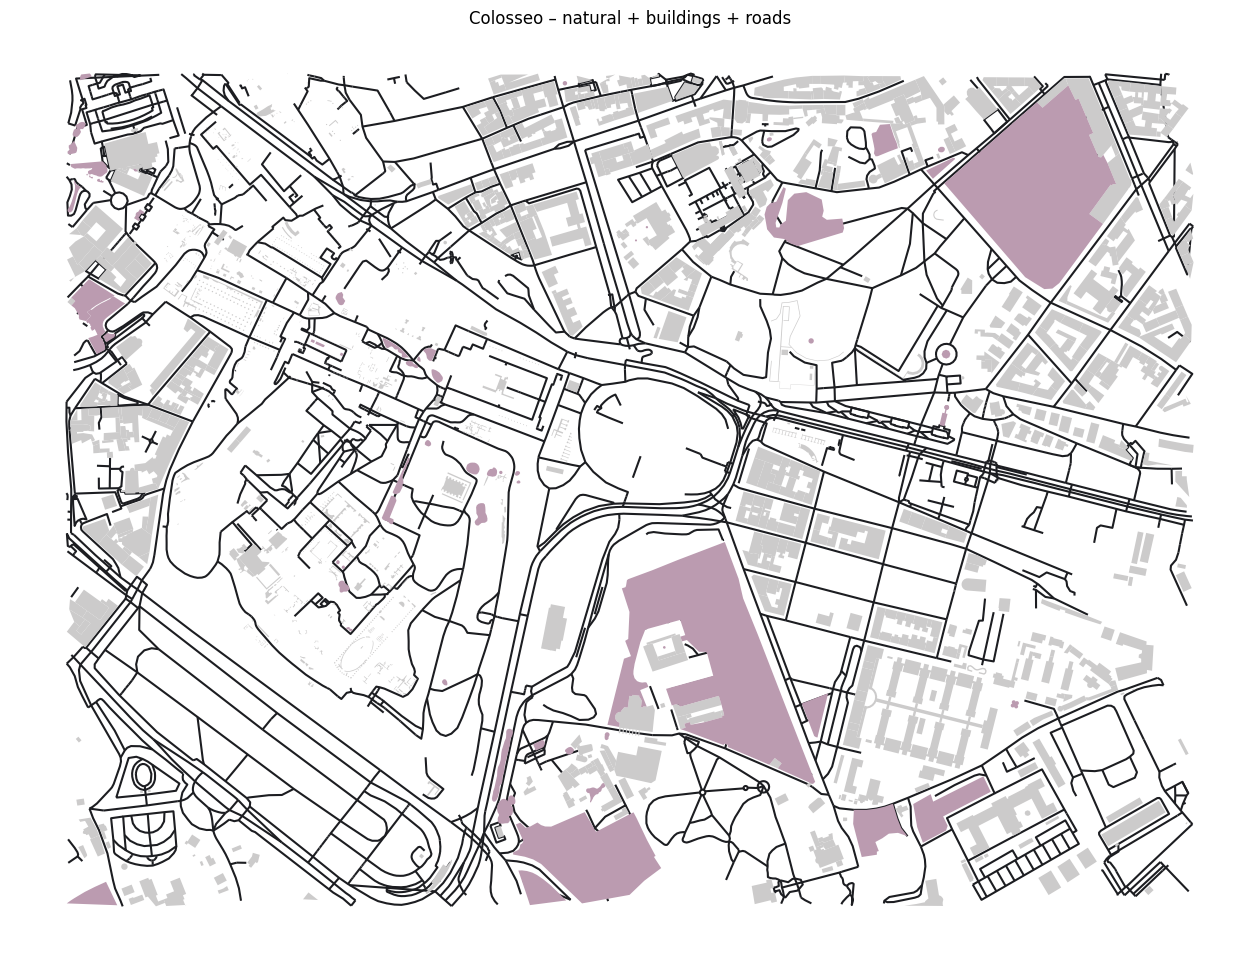


✅ CO VŠECHNO BYLO PROVEDENO:
- Připojen Google Drive.
- Nalezen a rozbalen soubor 'colosseo.zip' do složky 'colosseo_unzipped'.
- Vyhledány shapefily 'natural.shp', 'buildings.shp' a 'roads.shp'.
- Načteny do GeoDataFrames: colosseo_natural, colosseo_buildings, colosseo_roads.
- Vytvořeny 3 mapové vrstvy s různými barvami a z-order (3, 2, 1).
- Do proměnných first_layer_plot, second_layer_plot, third_layer_plot byly uloženy objekty Axes/plot.


In [18]:
# Shapefile – exercise 3
# colosseo.zip: načtení natural, buildings, roads a vícevrstvá mapa

# 1) Instalace geopandas (pokud už je nainstalováno, jen se znovu tiše přejede)
!pip install geopandas shapely pyproj fiona >/dev/null

# 2) Importy
from google.colab import drive
import os
import zipfile
import geopandas as gpd
import matplotlib.pyplot as plt

# 3) Připojení Google Drive
drive.mount('/content/drive')

# 4) Cesty
base_dir = "/content/drive/MyDrive/Colab Notebooks/Vis/Shapefile"
colosseo_zip = os.path.join(base_dir, "colosseo.zip")
extract_dir = os.path.join(base_dir, "colosseo_unzipped")

print("Základní složka:", base_dir)
print("ZIP soubor:", colosseo_zip)
print("Složka pro rozbalení:", extract_dir)
print("-" * 60)

# 5) Kontrola existence colosseo.zip
if not os.path.isfile(colosseo_zip):
    raise FileNotFoundError(
        f"Soubor {colosseo_zip} neexistuje. "
        "Zkontroluj, že je ve složce Shapefile soubor 'colosseo.zip'."
    )

# 6) Rozbalení ZIPu
os.makedirs(extract_dir, exist_ok=True)
with zipfile.ZipFile(colosseo_zip, "r") as zf:
    zf.extractall(extract_dir)

print("✅ colosseo.zip byl rozbalen do:")
print(extract_dir)
print("\nSoubory po rozbalení:")
for root, dirs, files in os.walk(extract_dir):
    for f in files:
        print(" -", os.path.join(root, f))
print("-" * 60)

# 7) Vyhledání shapefilů natural.shp, buildings.shp, roads.shp
natural_path = buildings_path = roads_path = None

for root, dirs, files in os.walk(extract_dir):
    for f in files:
        lower = f.lower()
        if lower == "natural.shp":
            natural_path = os.path.join(root, f)
        elif lower == "buildings.shp":      # ve výpisu je správně 'buildings.shp'
            buildings_path = os.path.join(root, f)
        elif lower == "roads.shp":
            roads_path = os.path.join(root, f)

print("Nalezené shapefily:")
print(" - natural:", natural_path)
print(" - buildings:", buildings_path)
print(" - roads:", roads_path)

if not all([natural_path, buildings_path, roads_path]):
    raise FileNotFoundError(
        "Nepodařilo se najít všechny shapefily (natural, buildings, roads). "
        "Zkontroluj obsah colosseo.zip."
    )

# 8) Načtení do GeoDataFrames
colosseo_natural   = gpd.read_file(natural_path)
colosseo_buildings = gpd.read_file(buildings_path)
colosseo_roads     = gpd.read_file(roads_path)

print("\n✅ Shapefily načteny do GeoDataFrames:")
print("- colosseo_natural   – počet řádků:", len(colosseo_natural))
print("- colosseo_buildings – počet řádků:", len(colosseo_buildings))
print("- colosseo_roads     – počet řádků:", len(colosseo_roads))

# 9) První vizualizační vrstva – jen přírodní prvky (natural)
fig, ax = plt.subplots(figsize=(16, 14))
first_layer_plot = colosseo_natural.plot(
    ax=ax,
    color="#BB9BB0",
    zorder=3
)
ax.set_title("Colosseo – natural layer")
# Osy zatím necháme zapnuté kvůli kontrole

# 10) Druhá vrstva – přidáme buildings k natural
fig2, ax2 = plt.subplots(figsize=(16, 14))
colosseo_natural.plot(
    ax=ax2,
    color="#BB9BB0",
    zorder=3
)
second_layer_plot = colosseo_buildings.plot(
    ax=ax2,
    color="#CCCBCB",
    zorder=2
)
ax2.set_title("Colosseo – natural + buildings")

# 11) Třetí vrstva – přidáme roads, vypneme osy
fig3, ax3 = plt.subplots(figsize=(16, 14))
colosseo_natural.plot(
    ax=ax3,
    color="#BB9BB0",
    zorder=3
)
colosseo_buildings.plot(
    ax=ax3,
    color="#CCCBCB",
    zorder=2
)
third_layer_plot = colosseo_roads.plot(
    ax=ax3,
    color="#1C1D21",
    zorder=1
)
ax3.set_title("Colosseo – natural + buildings + roads")
ax3.set_axis_off()   # vypnutí os, jak požaduje zadání

plt.show()

# 12) Souhrnný výpis – co všechno bylo provedeno
print("\n✅ CO VŠECHNO BYLO PROVEDENO:")
print("- Připojen Google Drive.")
print("- Nalezen a rozbalen soubor 'colosseo.zip' do složky 'colosseo_unzipped'.")
print("- Vyhledány shapefily 'natural.shp', 'buildings.shp' a 'roads.shp'.")
print("- Načteny do GeoDataFrames: colosseo_natural, colosseo_buildings, colosseo_roads.")
print("- Vytvořeny 3 mapové vrstvy s různými barvami a z-order (3, 2, 1).")
print("- Do proměnných first_layer_plot, second_layer_plot, third_layer_plot byly uloženy objekty Axes/plot.")


Shapefile – Exercise 4

Stáhni soubor monte_carlo.zip.

Nahraj ho na Drive nebo do Colabu.

Rozbal ho pomocí knihovny zipfile.

Nainstaluj a importuj knihovnu geopandas.

Načti natural.shp do proměnné monte_carlo_buildings.
(Ano, v zadání je to záměrně „přeházené“ — natural.shp → buildings).

Načti buildings.shp do monte_carlo_railways.

Načti roads.shp do monte_carlo_roads.

Vykresli monte_carlo_buildings (barva #ADCAD6, velikost 16×14, z-order 1).

Přidej vrstvu railways (barva #CCCBCB, z-order 2).

Přidej vrstvu roads (barva #1C1D21, z-order 3), vypni osy.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Používaný ZIP: /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/monte_carlo.zip
Cílová složka pro rozbalení: /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/monte_carlo_unzipped
------------------------------------------------------------
✅ monte_carlo.zip byl rozbalen do:
/content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/monte_carlo_unzipped

Nalezené shapefily:
 - natural.shp  → monte_carlo_buildings: /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/monte_carlo_unzipped/monte_carlo/shape/natural.shp
 - buildings.shp→ monte_carlo_railways: /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/monte_carlo_unzipped/monte_carlo/shape/buildings.shp
 - roads.shp    → monte_carlo_roads   : /content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/monte_carlo_unzipped/monte_carlo/shape/roads.shp

Počty objektů:
 - Buildings: 23
 - Railways : 975
 - Roads 

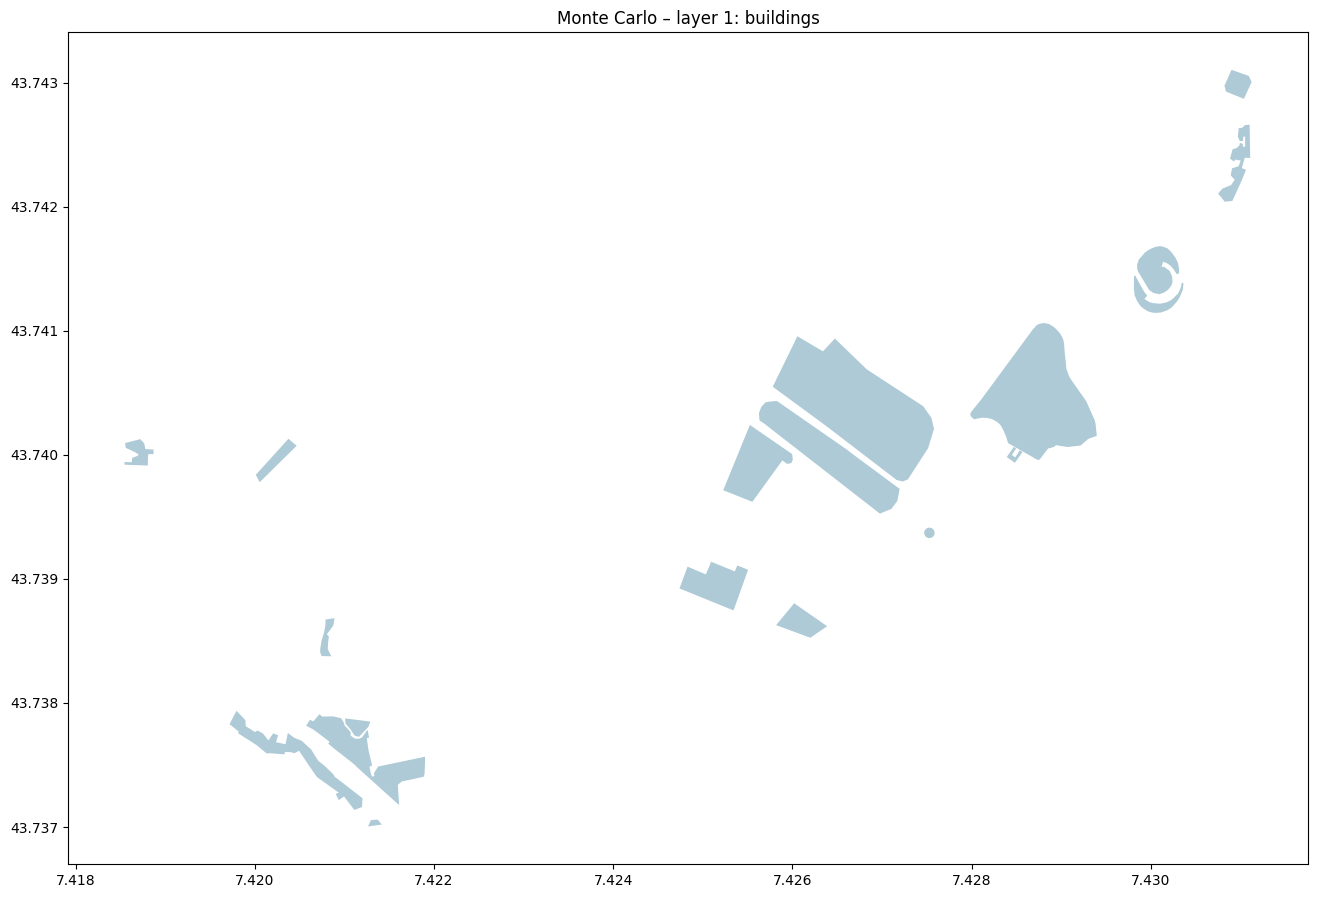

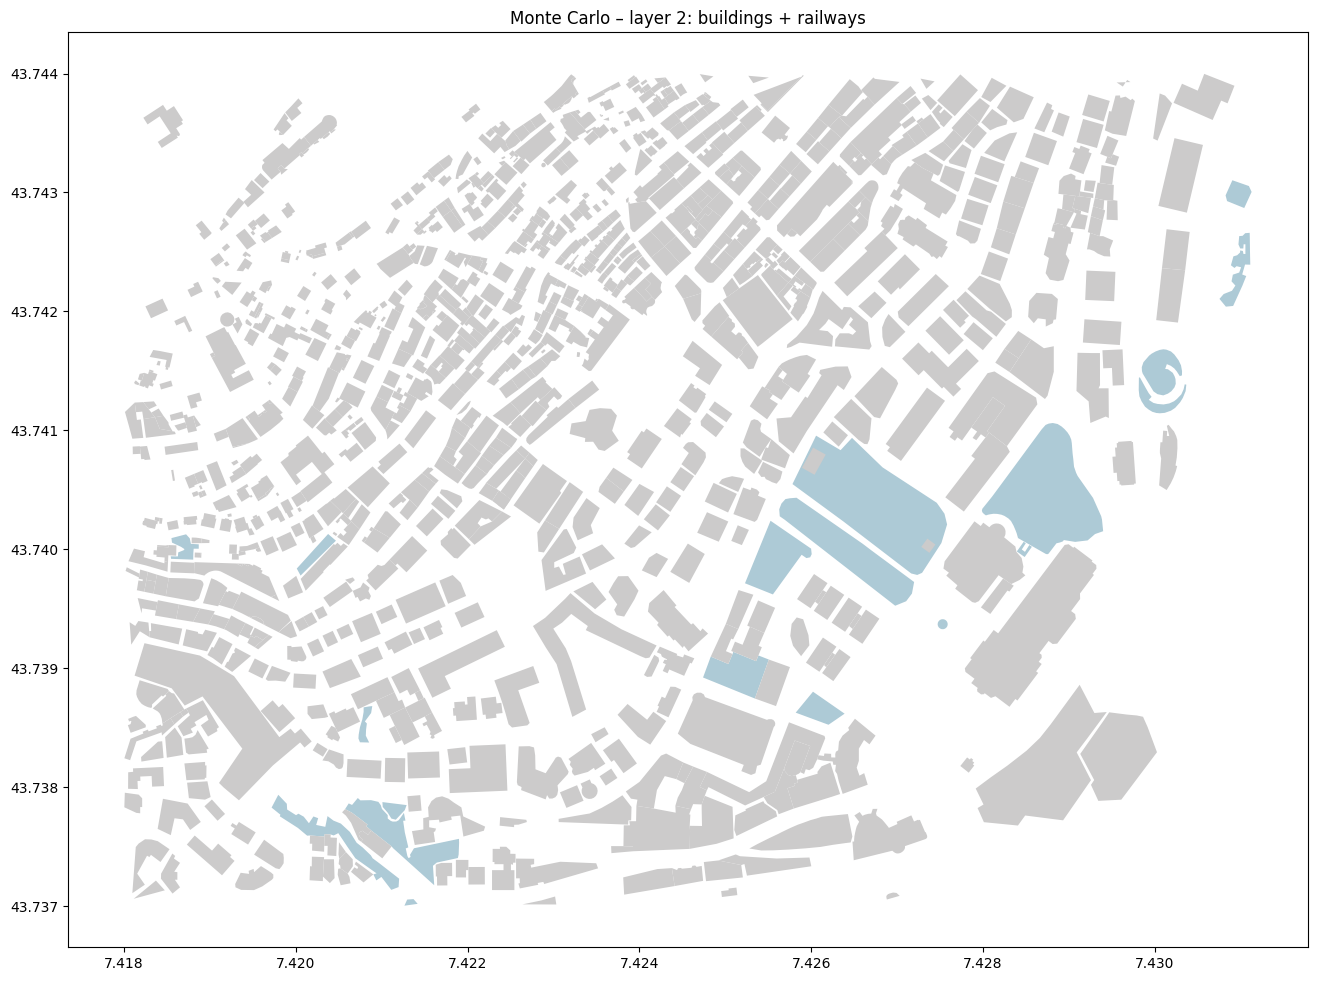

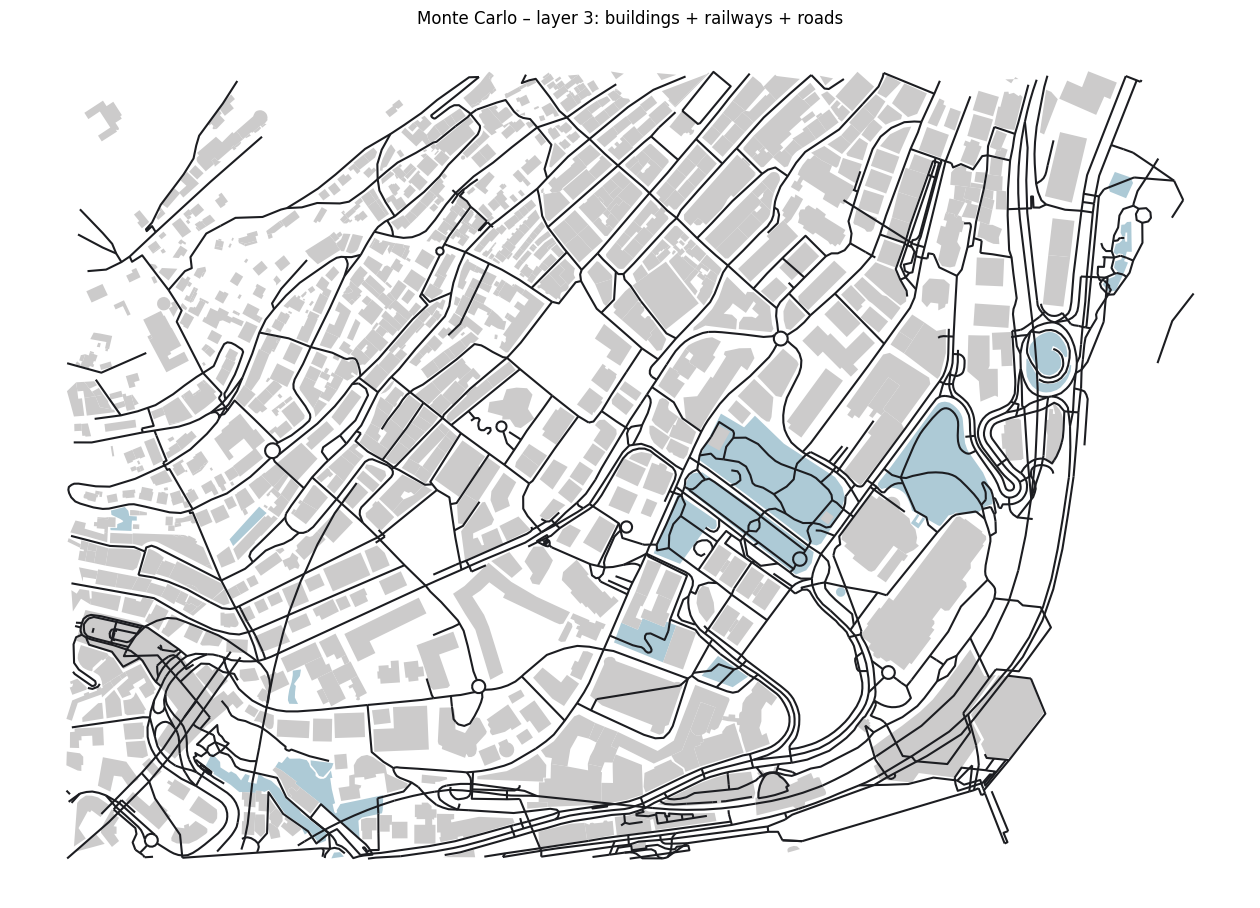


✅ CO VŠECHNO BYLO PROVEDENO:
- Připojen Google Drive.
- Rozbalen soubor 'monte_carlo.zip' do složky 'monte_carlo_unzipped'.
- Vyhledány shapefily 'natural.shp', 'buildings.shp', 'roads.shp'.
- Načteny do GeoDataFrames jako monte_carlo_buildings, monte_carlo_railways, monte_carlo_roads.
- Vytvořeny tři mapové vrstvy s požadovanými barvami a z-order (1, 2, 3), u třetí vrstvy vypnuty osy.


In [20]:
# Shapefile – exercise 4
# Monte Carlo: rozbalení monte_carlo.zip + 3 vrstvy mapy

!pip install geopandas shapely pyproj fiona >/dev/null

from google.colab import drive
import os, zipfile
import geopandas as gpd
import matplotlib.pyplot as plt

# 1) Připojení Google Drive
drive.mount('/content/drive')

# 2) PEVNÁ CESTA K ZIPU – přesně podle tvé struktury
zip_path = "/content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/monte_carlo.zip"
extract_dir = "/content/drive/MyDrive/Colab Notebooks/Vis/Shapefile/monte_carlo_unzipped"

print("Používaný ZIP:", zip_path)
print("Cílová složka pro rozbalení:", extract_dir)
print("-" * 60)

# 3) Kontrola, že ZIP existuje
if not os.path.isfile(zip_path):
    raise FileNotFoundError(f"Soubor neexistuje: {zip_path}")

# 4) Rozbalení ZIPu (bod 3 zadání)
os.makedirs(extract_dir, exist_ok=True)
with zipfile.ZipFile(zip_path, "r") as zf:
    zf.extractall(extract_dir)

print("✅ monte_carlo.zip byl rozbalen do:")
print(extract_dir)

# 5) Najdeme shapefily natural.shp, buildings.shp, roads.shp uvnitř rozbalené složky
natural_path = buildings_path = roads_path = None

for root, dirs, files in os.walk(extract_dir):
    for f in files:
        low = f.lower()
        if low == "natural.shp":
            natural_path = os.path.join(root, f)
        elif low == "buildings.shp":
            buildings_path = os.path.join(root, f)
        elif low == "roads.shp":
            roads_path = os.path.join(root, f)

print("\nNalezené shapefily:")
print(" - natural.shp  → monte_carlo_buildings:", natural_path)
print(" - buildings.shp→ monte_carlo_railways:", buildings_path)
print(" - roads.shp    → monte_carlo_roads   :", roads_path)

if not all([natural_path, buildings_path, roads_path]):
    raise FileNotFoundError("Nepodařilo se najít všechny tři shapefily (natural, buildings, roads).")

# 6) Načtení do GeoDataFrames podle zadání
monte_carlo_buildings = gpd.read_file(natural_path)    # natural.shp → buildings
monte_carlo_railways  = gpd.read_file(buildings_path)  # buildings.shp → railways
monte_carlo_roads     = gpd.read_file(roads_path)      # roads.shp → roads

print("\nPočty objektů:")
print(" - Buildings:", len(monte_carlo_buildings))
print(" - Railways :", len(monte_carlo_railways))
print(" - Roads    :", len(monte_carlo_roads))

# 7) 1. vrstva – buildings
fig1, ax1 = plt.subplots(figsize=(16, 14))
monte_carlo_buildings.plot(ax=ax1, color="#ADCAD6", zorder=1)
ax1.set_title("Monte Carlo – layer 1: buildings")
first_layer_plot = ax1

# 8) 2. vrstva – buildings + railways
fig2, ax2 = plt.subplots(figsize=(16, 14))
monte_carlo_buildings.plot(ax=ax2, color="#ADCAD6", zorder=1)
monte_carlo_railways.plot(ax=ax2, color="#CCCBCB", zorder=2)
ax2.set_title("Monte Carlo – layer 2: buildings + railways")
second_layer_plot = ax2

# 9) 3. vrstva – buildings + railways + roads (osy vypnout)
fig3, ax3 = plt.subplots(figsize=(16, 14))
monte_carlo_buildings.plot(ax=ax3, color="#ADCAD6", zorder=1)
monte_carlo_railways.plot(ax=ax3, color="#CCCBCB", zorder=2)
monte_carlo_roads.plot(ax=ax3, color="#1C1D21", zorder=3)
ax3.set_title("Monte Carlo – layer 3: buildings + railways + roads")
ax3.set_axis_off()
third_layer_plot = ax3

plt.show()

# 10) Souhrnný výpis – co všechno bylo provedeno
print("\n✅ CO VŠECHNO BYLO PROVEDENO:")
print("- Připojen Google Drive.")
print("- Rozbalen soubor 'monte_carlo.zip' do složky 'monte_carlo_unzipped'.")
print("- Vyhledány shapefily 'natural.shp', 'buildings.shp', 'roads.shp'.")
print("- Načteny do GeoDataFrames jako monte_carlo_buildings, monte_carlo_railways, monte_carlo_roads.")
print("- Vytvořeny tři mapové vrstvy s požadovanými barvami a z-order (1, 2, 3), u třetí vrstvy vypnuty osy.")


Interpretace (co to znamená)

Buildings (v Monte Carlu) jsou plošné polygonové objekty – budovy.

Railways jsou lineární elementy (koleje).

Roads jsou silnice, které doplňují dopravní síť.

Použití z-order umožňuje:

Roads (černé) → nejvýše, aby byly viditelné.

Railways (šedé) → pod nimi.

Buildings (světle modré) → tvoří základní podklad.

Výsledek je vrstvená mapa podobná GIS systémům (ArcGIS, QGIS).